<img width="100" src="https://carbonplan-assets.s3.amazonaws.com/monogram/dark-small.png" style="margin-left:0px;margin-top:20px"/>

# Impulse Response Function Validation

_by Freya Chay (CarbonPlan)_

This notebook introduces walks through a series of steps to validate our implementation of the Joos
impulse response function.

Sources:

- Joos et al. Carbon dioxide and climate impulse response functions for the computation of
  greenhouse gas metrics: a multi-model analysis, Atmos. Chem. Phys., 13, 2793–2825,
  https://doi.org/10.5194/acp-13-2793-2013, 2013.

- Anthropogenic and Natural Radiative Forcing Supplementary Material. In: Climate Change 2013: The
  Physical Science Basis. Contribution of Working Group I to the Fifth Assessment Report of the
  Intergovernmental Panel on Climate Change,
  https://www.ipcc.ch/site/assets/uploads/2018/07/WGI_AR5.Chap_.8_SM.pdf


In [1]:
%load_ext watermark
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

from carbonplan import styles
styles.mpl.set_theme(style='carbonplan_light', font_scale=1.25)

In [2]:
%watermark -u -i -v -m -g -iv

Last updated: 2022-01-22T00:30:33.182826+00:00

Python implementation: CPython
Python version       : 3.9.9
IPython version      : 7.30.1

Compiler    : GCC 9.4.0
OS          : Linux
Release     : 5.4.0-1062-azure
Machine     : x86_64
Processor   : x86_64
CPU cores   : 2
Architecture: 64bit

Git hash: f3fee74a823cc800507259b30d334107fb8b7d80

carbonplan: 0.4.0
numpy     : 1.22.0
matplotlib: 3.5.1



## Generating an IRF curve


In [3]:
def get_irf_curve():

    # parameters from Joos et al., 2013 (Table 5)
    # https://doi.org/10.5194/acp-13-2793-2013
    a = [0.2173, 0.2240, 0.2824, 0.2763]
    tau = [0, 394.4, 36.54, 4.304]

    t_horizon = np.arange(1001)
    irf_curve = [a[0]] * len(t_horizon)
    for t in t_horizon:
        for i in np.arange(1, len(a)):
            irf_curve[t] = irf_curve[t] + (a[i] * np.exp(-t / tau[i]))

    return irf_curve

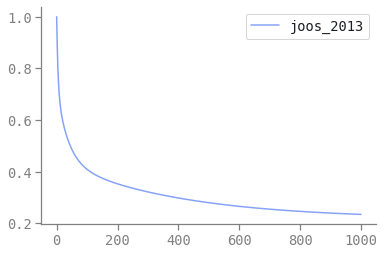

In [4]:
joos_2013 = get_irf_curve()
plt.plot(joos_2013, label="joos_2013")
_ = plt.legend()

## Comparing results


Joos et al. (2013) report the following time-dependent fractions of an original pulse of CO2
remaining in the atmosphere in section 4.1:

- 0.60 +- 0.14 at year 20
- 0.41 +- 0.13 at year 100
- (more than) 0.25 +- 0.09 at year 1000


In [5]:
print("At t=0:    " + str(round(joos_2013[0], 3)))
print("At t=20:   " + str(round(joos_2013[21], 2)))
print("At t=100:  " + str(round(joos_2013[101], 2)))
print("At t=1000: " + str(round(joos_2013[-1], 6)))

At t=0:    1.0
At t=20:   0.59
At t=100:  0.41
At t=1000: 0.235046


The IPCC AR5 Chapter 8 SM reports the following time integrated IRF mean values using the Joos et
al. 2013 parameters in Table 8.SM.11:

- 14.2 at year 20
- 52.4 at year 100


In [6]:
print("At t=20:    " + str(round(np.trapz(joos_2013[:21]), 1)))
print("At t=100:   " + str(round(np.trapz(joos_2013[:101]), 1)))

At t=20:    14.2
At t=100:   52.4
